In [1]:
#### labels from Serenelli+17 https://iopscience.iop.org/article/10.3847/1538-4365/aa97df

from astropy.table import Table
from six.moves import cPickle as pickle
from sys import version_info

import thecannon as tc
print(tc.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

from tqdm import tqdm

import process_spectra_gaus
import loocv

"""
# Load the training set labels.
training_set_labels = Table.read("apogee-dr14-giants.fits")

# Load the training set spectra.
pkl_kwds = dict(encoding="latin-1") if version_info[0] >= 3 else {}
with open("apogee-dr14-giants-flux-ivar.pkl", "rb") as fp:
    training_set_flux, training_set_ivar = pickle.load(fp, **pkl_kwds)

# Specify the labels that we will use to construct this model.
label_names = ("TEFF", "LOGG", "FE_H", "MG_FE")

# Construct a CannonModel object using a quadratic (O=2) polynomial vectorizer.
model = tc.CannonModel(
    training_set_labels, training_set_flux, training_set_ivar,
    vectorizer=tc.vectorizer.PolynomialVectorizer(label_names, 2))
"""

path = '/Users/chrislam/Desktop/cannon-ages/' 


0.2.93


### Read in Serenelli+17 and enrich

In [2]:
apokasc_sdss = pd.read_csv(path+'data/apokasc-sdss-teff.txt', sep='\s+')
apokasc_sdss

KIC    Teff  e_Teff    M_H  e_M_H    Rad  E_Rad  e_Rad  sysrad  \
0     1435467  6433.0    86.0 -0.028  0.099  1.693  0.015 -0.016   0.010   
1     2010607  6361.0    71.0 -0.070  0.100  2.410  0.100 -0.090   0.035   
2     2309595  5238.0    65.0 -0.095  0.101  2.423  0.076 -0.073   0.022   
3     2450729  6029.0    59.0 -0.212  0.100  1.758  0.059 -0.056   0.023   
4     2837475  6688.0    57.0 -0.015  0.100  1.710  0.022 -0.043   0.039   
..        ...     ...     ...    ...    ...    ...    ...    ...     ...   
410  12069569  6357.0    59.0 -0.109  0.100  2.314  0.086 -0.079   0.040   
411  12117868  6160.0    51.0 -0.108  0.099  1.326  0.045 -0.042   0.015   
412  12265063  6189.0    60.0 -0.268  0.101  1.641  0.052 -0.050   0.024   
413  12317678  6549.0    48.0 -0.300  0.204  1.851  0.019 -0.018   0.029   
414  12366681  6188.0    66.0  0.150  0.100  2.620  0.046 -0.033   0.032   

      Mass  ...  e_logg  syslogg      rho     E_rho     e_rho    sysrho  \
0    1.344  ...  -0.006    0.002  0.27770  0.002376 -0.002391  0.001505   
1    1.402  ...  -0.027    0.003  0.09973  0.009867 -0.009399  0.001393   
2    1.167  ...  -0.008    0.002  0.08183  0.002543 -0.002494  0.000710   
3    1.112  ...  -0.021    0.006  0.20430  0.015940 -0.014980  0.002889   
4    1.665  ...  -0.011    0.006  0.33190  0.002563 -0.002835  0.006216   
..     ...  ...     ...      ...      ...       ...       ...       ...   
410  1.363  ...  -0.025    0.005  0.10970  0.009884 -0.009495  0.001577   
411  1.110  ...  -0.022    0.004  0.47320  0.036820 -0.035430  0.003089   
412  1.120  ...  -0.022    0.007  0.25310  0.014570 -0.024930  0.003163   
413  1.452  ...  -0.006    0.006  0.22920  0.001406 -0.001587  0.002450   
414  1.516  ...  -0.008    0.006  0.08423  0.001420 -0.001399  0.001062   

       Age  E_Age  e_Age  sysAge  
0    2.605  0.302 -0.293   0.215  
1    2.755  0.296 -0.301   0.184  
2    5.460  1.351 -1.023   0.422  
3    6.034  0.804 -0.718   0.550  
4    1.131  0.197 -0.181   0.221  
..     ...    ...    ...     ...  
410  2.979  0.274 -0.281   0.315  
411  4.722  0.979 -0.878   0.938  
412  5.405  0.788 -0.779   0.906  
413  1.986  0.210 -0.197   0.212  
414  2.499  0.166 -0.242   0.262  

[415 rows x 25 columns]

In [3]:
apokasc_sdss = apokasc_sdss.loc[apokasc_sdss['Rad'] > 0]
#apokasc_sdss = apokasc_sdss.loc[apokasc_sdss['logg'] >= 4]
#apokasc_sdss.to_csv(path+'data/apokasc-sdss-teff-valid.txt')

apokasc_sdss

KIC    Teff  e_Teff    M_H  e_M_H    Rad  E_Rad  e_Rad  sysrad  \
0     1435467  6433.0    86.0 -0.028  0.099  1.693  0.015 -0.016   0.010   
1     2010607  6361.0    71.0 -0.070  0.100  2.410  0.100 -0.090   0.035   
2     2309595  5238.0    65.0 -0.095  0.101  2.423  0.076 -0.073   0.022   
3     2450729  6029.0    59.0 -0.212  0.100  1.758  0.059 -0.056   0.023   
4     2837475  6688.0    57.0 -0.015  0.100  1.710  0.022 -0.043   0.039   
..        ...     ...     ...    ...    ...    ...    ...    ...     ...   
410  12069569  6357.0    59.0 -0.109  0.100  2.314  0.086 -0.079   0.040   
411  12117868  6160.0    51.0 -0.108  0.099  1.326  0.045 -0.042   0.015   
412  12265063  6189.0    60.0 -0.268  0.101  1.641  0.052 -0.050   0.024   
413  12317678  6549.0    48.0 -0.300  0.204  1.851  0.019 -0.018   0.029   
414  12366681  6188.0    66.0  0.150  0.100  2.620  0.046 -0.033   0.032   

      Mass  ...  e_logg  syslogg      rho     E_rho     e_rho    sysrho  \
0    1.344  ...  -0.006    0.002  0.27770  0.002376 -0.002391  0.001505   
1    1.402  ...  -0.027    0.003  0.09973  0.009867 -0.009399  0.001393   
2    1.167  ...  -0.008    0.002  0.08183  0.002543 -0.002494  0.000710   
3    1.112  ...  -0.021    0.006  0.20430  0.015940 -0.014980  0.002889   
4    1.665  ...  -0.011    0.006  0.33190  0.002563 -0.002835  0.006216   
..     ...  ...     ...      ...      ...       ...       ...       ...   
410  1.363  ...  -0.025    0.005  0.10970  0.009884 -0.009495  0.001577   
411  1.110  ...  -0.022    0.004  0.47320  0.036820 -0.035430  0.003089   
412  1.120  ...  -0.022    0.007  0.25310  0.014570 -0.024930  0.003163   
413  1.452  ...  -0.006    0.006  0.22920  0.001406 -0.001587  0.002450   
414  1.516  ...  -0.008    0.006  0.08423  0.001420 -0.001399  0.001062   

       Age  E_Age  e_Age  sysAge  
0    2.605  0.302 -0.293   0.215  
1    2.755  0.296 -0.301   0.184  
2    5.460  1.351 -1.023   0.422  
3    6.034  0.804 -0.718   0.550  
4    1.131  0.197 -0.181   0.221  
..     ...    ...    ...     ...  
410  2.979  0.274 -0.281   0.315  
411  4.722  0.979 -0.878   0.938  
412  5.405  0.788 -0.779   0.906  
413  1.986  0.210 -0.197   0.212  
414  2.499  0.166 -0.242   0.262  

[408 rows x 25 columns]

In [4]:
import helpers
# get a sense of how wide the supports should be
print(np.mean(apokasc_sdss['E_Age']/apokasc_sdss['Age']))
print(np.mean(apokasc_sdss['e_Age']/apokasc_sdss['Age']))


0.20709426880688128
-0.1634573750373721


In [5]:
def draw_asymmetrically(df, mode_name, err1_name, err2_name, drawn):
    """
    Draw stellar properties with asymmetric errors. 
    This is the generalized version of draw_star_ages(), below
    
    Inputs:
    - df: berger_kepler [Pandas DataFrame]
    - mode_name: name of mode column [string]
    - err1_name: name of err1 column [string]
    - err2_name: name of err2 column [string]
    - drawn: name of new column [string]

    Output:
    - df: berger_kepler_df, now with new column with drawn parameter, "drawn" [Pandas DataFrame]
    """

    # in case df is broken up by planet and not star
    #uniques = df.drop_duplicates(subset=['kepid'])
    
    if drawn=='age':
        x = np.linspace(0.5, 13.5, 100)
    elif drawn=='gyro_age':
        x = np.linspace(0.5, 4., 100)
    elif drawn=='stellar_radius':
        x = np.linspace(0.5, 5., 100)
    elif drawn=='stellar_mass':
        x = np.linspace(0.5, 2.5, 100)
    elif drawn=='stellar_teff':
        x = np.linspace(2000, 7500, 1000)
    elif drawn=='stellar_feh':
        x = np.linspace(-0.5, 0.5, 100)
    elif drawn=='distance':
        x = np.linspace(0, 5000, 1000)
    elif drawn=='planet_radius':
        x = np.linspace(0.5, 10, 100)
    elif drawn=='Teff_drawn':
        x = np.linspace(3400, 7000, 1000)

    else: 
        print("Please create a column that is either age, gyro_age, stellar_radius, stellar_mass, distance, planet_radius, stellar_feh, or stellar_teff!")

    draws = np.ones(len(df))
    for i in range(len(df)):
        mode = df.iloc[i][mode_name]
        err1 = df.iloc[i][err1_name]
        err2 = np.abs(df.iloc[i][err2_name])
        
        # symmetric uncertainties
        if err1==err2:
            draw = 0
            while draw <= 0: # make sure the draw is positive
                draw = np.around(np.random.normal(mode, err1), 2)

        # asymmetric uncertainties
        elif err1!=err2:
            pdf = helpers.make_pdf_rows(x, mode, err1, err2)
            pdf = pdf/np.sum(pdf)

            try:
                draw = 0
                while draw <= 0: # make sure the draw is positive
                    draw = np.around(np.random.choice(x, p=pdf), 2)
            except Exception as e:
                print("EXCEPTION: ", i, pdf, mode, err1, err2)
                print(e)
                break
        #print(mode, err1, err2, draw)
        draws[i] = draw

    #print(len(df), len(draws), len(uniques))
    df[drawn] = draws
    
    return df[drawn]

In [6]:
age_support = np.linspace(0, 14, 100)
teff_support = np.linspace(3900, 7500, 100)

#apokasc_sdss['Age_drawn'] = helpers.draw_asymmetrically(apokasc_sdss['Age'], apokasc_sdss['E_Age'], apokasc_sdss['e_Age'], can_be_negative=False, x=age_support) + np.random.normal(0, apokasc_sdss['sysAge'])
apokasc_sdss['age'] = draw_asymmetrically(apokasc_sdss, 'Age', 'E_Age', 'e_Age', 'age') + np.random.normal(0, apokasc_sdss['sysAge'])
apokasc_sdss['age']


/var/folders/tt/rlpbr2fs7lx14h3f5_21mr240000gn/T/ipykernel_41622/2426512832.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[drawn] = draws
/var/folders/tt/rlpbr2fs7lx14h3f5_21mr240000gn/T/ipykernel_41622/841658914.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apokasc_sdss['age'] = draw_asymmetrically(apokasc_sdss, 'Age', 'E_Age', 'e_Age', 'age') + np.random.normal(0, apokasc_sdss['sysAge'])


0      2.097737
1      2.645886
2      4.341814
3      6.177483
4      0.947990
         ...   
410    2.820687
411    4.535487
412    4.806689
413    2.100297
414    2.227555
Name: age, Length: 408, dtype: float64

### Inspect sample

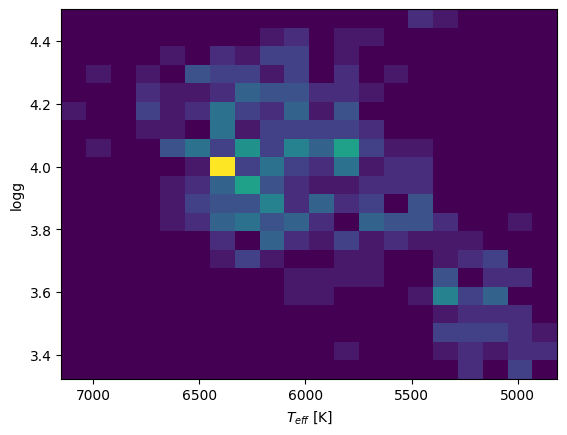

In [7]:
plt.hist2d(apokasc_sdss['Teff'], apokasc_sdss['logg'], bins=[20, 20])
plt.xlabel(r'$T_{eff}$ [K]')
plt.ylabel('logg')
plt.gca().set_xlim(max(apokasc_sdss['Teff']), min(apokasc_sdss['Teff']))
plt.savefig(path+'plots/serenelli_logg_vs_teff.png')
plt.show()

### Inspect spectra

In [51]:
kic0 = pd.read_csv(path+'data/spectra/RVS-Gaia DR3 4111834567779557376.csv') 
kic0

source_id          solution_id         ra        dec  \
0     4111834567779557376  5950420259779346465  256.52291 -26.580565   
1     4111834567779557376  5950420259779346465  256.52291 -26.580565   
2     4111834567779557376  5950420259779346465  256.52291 -26.580565   
3     4111834567779557376  5950420259779346465  256.52291 -26.580565   
4     4111834567779557376  5950420259779346465  256.52291 -26.580565   
...                   ...                  ...        ...        ...   
2396  4111834567779557376  5950420259779346465  256.52291 -26.580565   
2397  4111834567779557376  5950420259779346465  256.52291 -26.580565   
2398  4111834567779557376  5950420259779346465  256.52291 -26.580565   
2399  4111834567779557376  5950420259779346465  256.52291 -26.580565   
2400  4111834567779557376  5950420259779346465  256.52291 -26.580565   

      wavelength      flux  flux_error  combined_transits  combined_ccds  \
0         846.00  1.001296    0.003652                 31             92   
1         846.01  1.000554    0.002156                 31             92   
2         846.02  0.999202    0.002452                 31             92   
3         846.03  1.001321    0.002456                 31             92   
4         846.04  1.002171    0.002092                 31             92   
...          ...       ...         ...                ...            ...   
2396      869.96  1.006668    0.001241                 31             92   
2397      869.97  1.005519    0.001411                 31             92   
2398      869.98  1.006041    0.001347                 31             92   
2399      869.99  1.006969    0.001533                 31             92   
2400      870.00  1.007885    0.001582                 31             92   

      deblended_ccds  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
2396               0  
2397               0  
2398               0  
2399               0  
2400               0  

[2401 rows x 10 columns]

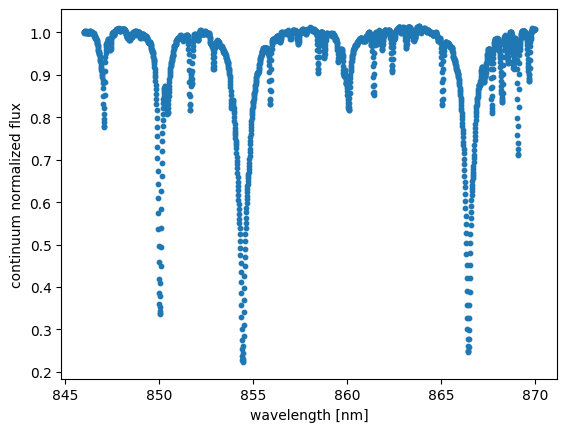

In [113]:
plt.scatter(kic0['wavelength'], kic0['flux'], s=10)
plt.ylabel('continuum normalized flux')
plt.xlabel('wavelength [nm]')
plt.savefig(path+'plots/sample_spectrum0.png')
plt.show()

### Crossmatch with Bedell reference to enrich with Gaia source_id

In [4]:
# Bedell cross-match has the Gaia DR3 source_id we need 
bedell = Table.read(path+'data/kepler_dr3_good.fits')
bedell_df = bedell.to_pandas()

In [5]:
apokasc_sdss_bedell_df = pd.merge(apokasc_sdss, bedell_df, left_on='KIC', right_on='kepid')
apokasc_sdss_bedell_df = apokasc_sdss_bedell_df.rename(columns={"logg_x": "logg"})
#apokasc_sdss_bedell_df.to_csv(path+'data/apokasc-sdss-teff-valid.txt')
apokasc_sdss_bedell_df

KIC    Teff  e_Teff    M_H  e_M_H    Rad  E_Rad  e_Rad  sysrad  \
0     1435467  6433.0    86.0 -0.028  0.099  1.693  0.015 -0.016   0.010   
1     2010607  6361.0    71.0 -0.070  0.100  2.410  0.100 -0.090   0.035   
2     2309595  5238.0    65.0 -0.095  0.101  2.423  0.076 -0.073   0.022   
3     2450729  6029.0    59.0 -0.212  0.100  1.758  0.059 -0.056   0.023   
4     2837475  6688.0    57.0 -0.015  0.100  1.710  0.022 -0.043   0.039   
..        ...     ...     ...    ...    ...    ...    ...    ...     ...   
401  12069569  6357.0    59.0 -0.109  0.100  2.314  0.086 -0.079   0.040   
402  12117868  6160.0    51.0 -0.108  0.099  1.326  0.045 -0.042   0.015   
403  12265063  6189.0    60.0 -0.268  0.101  1.641  0.052 -0.050   0.024   
404  12317678  6549.0    48.0 -0.300  0.204  1.851  0.019 -0.018   0.029   
405  12366681  6188.0    66.0  0.150  0.100  2.620  0.046 -0.033   0.032   

      Mass  ...  mass_err2  prov_sec  nconfp  nkoi  ntce    jmag    hmag  \
0    1.344  ...     -0.075   b'DSEP'       0     0     0   7.983   7.753   
1    1.402  ...     -0.111   b'DSEP'       0     1     1  10.427  10.204   
2    1.167  ...     -0.140   b'DSEP'       0     0     1  10.040   9.604   
3    1.112  ...     -0.063   b'DSEP'       0     0     0   9.585   9.333   
4    1.665  ...     -0.067   b'DSEP'       0     0     0   7.649   7.481   
..     ...  ...        ...       ...     ...   ...   ...     ...     ...   
401  1.363  ...     -0.098   b'DSEP'       0     0     0  10.286  10.070   
402  1.110  ...     -0.065   b'DSEP'       0     0     0   9.486   9.279   
403  1.120  ...     -0.066   b'DSEP'       0     0     0   9.939   9.682   
404  1.452  ...     -0.116   b'DSEP'       0     0     0   7.883   7.655   
405  1.516  ...     -0.066   b'DSEP'       0     1     0   8.581   8.420   

       kmag  planet?  kepler_gaia_mag_diff  
0     7.718  b'none'             -0.094316  
1    10.155  b'cand'             -0.027483  
2     9.500  b'none'             -0.026662  
3     9.283  b'none'             -0.038274  
4     7.464  b'none'             -0.075163  
..      ...      ...                   ...  
401  10.039  b'none'             -0.045595  
402   9.218  b'none'             -0.040008  
403   9.626  b'none'             -0.032385  
404   7.631  b'none'             -0.078539  
405   8.366  b'cand'             -0.032188  

[406 rows x 111 columns]

In [89]:
#apokasc_sdss_bedell_df[list(apokasc_sdss.columns) + ['source_id']].to_csv(path+'data/apokasc-sdss-teff-valid.txt')



In [9]:
avg_age_err = 0.5 * (apokasc_sdss['E_Age'] + np.abs(apokasc_sdss['e_Age']))
apokasc_sdss['fractional_age_err'] = (avg_age_err + apokasc_sdss['sysAge'])/apokasc_sdss['Age']
print(apokasc_sdss['fractional_age_err'])

0      0.196737
1      0.175136
2      0.294689
3      0.217269
4      0.362511
         ...   
410    0.198892
411    0.395277
412    0.312581
413    0.209215
414    0.186475
Name: fractional_age_err, Length: 408, dtype: float64


/var/folders/tt/rlpbr2fs7lx14h3f5_21mr240000gn/T/ipykernel_41622/1771102346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apokasc_sdss['fractional_age_err'] = (avg_age_err + apokasc_sdss['sysAge'])/apokasc_sdss['Age']


In [32]:
### split between training and test label sets
apokasc_sdss_bedell_df_tr = apokasc_sdss_bedell_df.iloc[:70]
apokasc_sdss_bedell_df_test = apokasc_sdss_bedell_df.iloc[70:100]

### Crossmatch diagnostics. Also, Silva Aguirre+17 sample.

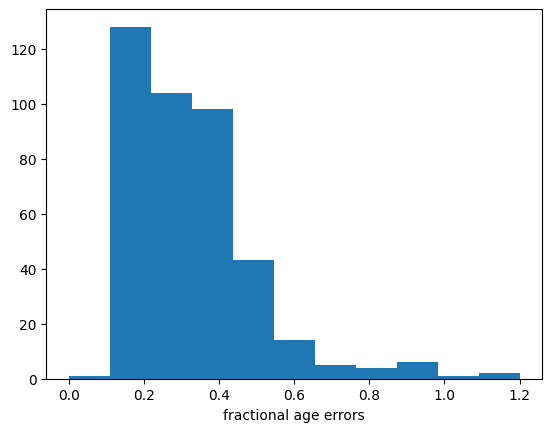

In [11]:
plt.hist(apokasc_sdss['fractional_age_err'], np.linspace(0, 1.2, 12))
plt.xlabel('fractional age errors')
plt.savefig(path+'plots/serenelli_fractional_age_errors.png')
plt.show()

In [12]:
good = apokasc_sdss.loc[apokasc_sdss['fractional_age_err'] < 0.3]

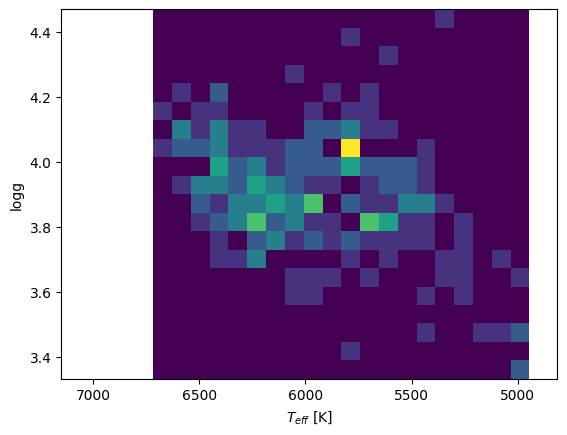

In [13]:
plt.hist2d(good['Teff'], good['logg'], bins=[20, 20])
plt.xlabel(r'$T_{eff}$ [K]')
plt.ylabel('logg')
plt.gca().set_xlim(max(apokasc_sdss['Teff']), min(apokasc_sdss['Teff']))
#plt.savefig(path+'plots/serenelli_logg_vs_teff.png')
plt.show()

So that was Serenelli+17 (APOKASC). 

Silva Aguirre+17 (https://iopscience.iop.org/article/10.3847/1538-4357/835/2/173#apjaa5587t4) also came up with a sample of asteroseismic age main sequence stars. Let's repeat with this smaller sample. 

In [5]:
silva_aguirre = pd.read_csv(path+'data/silva-aguirre-legacy.txt', sep='\s+')
silva_aguirre

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/tt/rlpbr2fs7lx14h3f5_21mr240000gn/T/ipykernel_4643/2411765538.py:1: SyntaxWarning: invalid escape sequence '\s'
  silva_aguirre = pd.read_csv(path+'data/silva-aguirre-legacy.txt', sep='\s+')


KIC    Mass  sMassP  sMassM     Rad   sRadP   sRadM    Grav  sGravP  \
0    1435467  1.3821  0.0460 -0.0460  1.7181  0.0215 -0.0215  4.1080  0.0048   
1    2837475  1.4363  0.0656 -0.0656  1.6529  0.0259 -0.0259  4.1581  0.0070   
2    3427720  1.1266  0.0367 -0.0367  1.1232  0.0133 -0.0133  4.3884  0.0039   
3    3456181  1.4881  0.0409 -0.0409  2.1468  0.0238 -0.0238  3.9467  0.0034   
4    3632418  1.3980  0.0312 -0.0312  1.9053  0.0163 -0.0163  4.0232  0.0027   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
61  12069127  1.5894  0.0509 -0.0509  2.3051  0.0275 -0.0275  3.9134  0.0046   
62  12069424  1.0760  0.0344 -0.0505  1.2253  0.0072 -0.0072  4.2930  0.0024   
63  12069449  1.0298  0.0277 -0.0277  1.1115  0.0105 -0.0105  4.3585  0.0035   
64  12258514  1.2704  0.0278 -0.0278  1.6085  0.0136 -0.0136  4.1287  0.0023   
65  12317678  1.3408  0.0444 -0.0444  1.8089  0.0208 -0.0208  4.0500  0.0050   

    sGravM  ...  MCcore  sMCcoreP  sMCcoreM     Rbe   sRbeP   sRbeM  alp_conv  \
0  -0.0048  ...  0.0984    0.0067   -0.0067  0.8457  0.0144 -0.0144    1.6918   
1  -0.0070  ...  0.1159    0.0087   -0.0087  0.9021  0.0204 -0.0204    1.3851   
2  -0.0039  ...  0.0000    0.0002   -0.0002  0.7878  0.0077 -0.0077    1.6172   
3  -0.0034  ...  0.0942    0.0066   -0.0066  0.8693  0.0124 -0.0124    1.6143   
4  -0.0027  ...  0.0820    0.0061   -0.0061  0.8299  0.0095 -0.0095    1.7130   
..     ...  ...     ...       ...       ...     ...     ...     ...       ...   
61 -0.0046  ...  0.1086    0.0076   -0.0076  0.8645  0.0138 -0.0138    1.6715   
62 -0.0024  ...  0.0000    0.0000   -0.0000  0.7255  0.0055 -0.0055    1.6738   
63 -0.0035  ...  0.0000    0.0000   -0.0000  0.7117  0.0079 -0.0079    1.7610   
64 -0.0023  ...  0.0592    0.0062   -0.0062  0.7755  0.0102 -0.0102    1.6985   
65 -0.0050  ...  0.0912    0.0072   -0.0072  0.9068  0.0069 -0.0069    1.5152   

    salp_convP  salp_convM    TAMS  
0       0.1243     -0.1243  3.0675  
1       0.1279     -0.1279  2.4957  
2       0.0872     -0.0872  6.2641  
3       0.1012     -0.1012  2.0898  
4       0.0983     -0.0983  2.8318  
..         ...         ...     ...  
61      0.0240     -0.0240  1.8826  
62      0.0465     -0.0465  9.0157  
63      0.1071     -0.1071  9.7540  
64      0.0753     -0.0753  4.5702  
65      0.0986     -0.0986  2.3824  

[66 rows x 50 columns]

In [11]:
silva_aguirre_bedell_df = pd.merge(silva_aguirre, bedell_df, left_on='KIC', right_on='kepid')
#silva_aguirre_bedell_df = silva_aguirre_bedell_df.rename(columns={"logg_x": "logg"})
silva_aguirre_bedell_df.to_csv(path+'data/silva-aguirre-bedell.txt')
silva_aguirre_bedell_df

KIC    Mass  sMassP  sMassM     Rad   sRadP   sRadM    Grav  sGravP  \
0    1435467  1.3821  0.0460 -0.0460  1.7181  0.0215 -0.0215  4.1080  0.0048   
1    2837475  1.4363  0.0656 -0.0656  1.6529  0.0259 -0.0259  4.1581  0.0070   
2    3427720  1.1266  0.0367 -0.0367  1.1232  0.0133 -0.0133  4.3884  0.0039   
3    3456181  1.4881  0.0409 -0.0409  2.1468  0.0238 -0.0238  3.9467  0.0034   
4    3632418  1.3980  0.0312 -0.0312  1.9053  0.0163 -0.0163  4.0232  0.0027   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
60  12069127  1.5894  0.0509 -0.0509  2.3051  0.0275 -0.0275  3.9134  0.0046   
61  12069424  1.0760  0.0344 -0.0505  1.2253  0.0072 -0.0072  4.2930  0.0024   
62  12069449  1.0298  0.0277 -0.0277  1.1115  0.0105 -0.0105  4.3585  0.0035   
63  12258514  1.2704  0.0278 -0.0278  1.6085  0.0136 -0.0136  4.1287  0.0023   
64  12317678  1.3408  0.0444 -0.0444  1.8089  0.0208 -0.0208  4.0500  0.0050   

    sGravM  ...  mass_err2  prov_sec  nconfp  nkoi  ntce   jmag   hmag   kmag  \
0  -0.0048  ...     -0.075   b'DSEP'       0     0     0  7.983  7.753  7.718   
1  -0.0070  ...     -0.067   b'DSEP'       0     0     0  7.649  7.481  7.464   
2  -0.0039  ...     -0.063   b'DSEP'       0     0     0  8.094  7.843  7.826   
3  -0.0034  ...     -0.091   b'DSEP'       0     0     0  8.733  8.530  8.479   
4  -0.0027  ...     -0.079   b'DSEP'       1     1     1  7.229  7.031  6.945   
..     ...  ...        ...       ...     ...   ...   ...    ...    ...    ...   
60 -0.0046  ...     -0.092   b'DSEP'       0     0     0  9.733  9.524  9.494   
61 -0.0024  ...     -0.059   b'DSEP'       0     0     0  5.091  4.724  4.426   
62 -0.0035  ...     -0.057   b'DSEP'       1     0     0  4.993  4.695  4.651   
63 -0.0023  ...     -0.068   b'DSEP'       0     0     0  7.035  6.797  6.758   
64 -0.0050  ...     -0.116   b'DSEP'       0     0     0  7.883  7.655  7.631   

    planet?  kepler_gaia_mag_diff  
0   b'none'             -0.094316  
1   b'none'             -0.075163  
2   b'none'             -0.062270  
3   b'none'             -0.095604  
4   b'conf'             -0.084423  
..      ...                   ...  
60  b'none'             -0.077890  
61  b'none'             -0.045927  
62  b'conf'             -0.021581  
63  b'none'             -0.057067  
64  b'none'             -0.078539  

[65 rows x 136 columns]

### Fold in Serenelli+17 Table 3, for asteroseismic parameters

In [6]:
serenelli_table3 = pd.read_csv(path+'data/serenelli_table3.txt',sep='\s+')
print(serenelli_table3)

          KIC     numax  e_numax     Dnu  e_Dnu  Length    HBR
0     1435467  1382.311   19.038  70.558  0.087   938.1  1.662
1     2010607   674.919  146.523  42.479  2.185    28.9  1.547
2     2309595   643.208   11.226  39.029  0.721    28.9  1.767
3     2450729  1053.105  114.904  61.910  2.539    28.9  1.470
4     2837475  1629.761   18.396  75.720  0.129  1029.4  1.767
..        ...       ...      ...     ...    ...     ...    ...
410  12069569   737.053  102.768  44.687  2.162    31.1  1.472
411  12117868  1859.173  186.779  93.695  3.943    31.1  1.244
412  12265063  1324.832  232.036  67.875  2.498    29.2  1.169
413  12317678  1248.595   14.625  63.573  0.089  1047.5  1.880
414  12366681   690.176   32.749  39.276  0.309    87.8  1.700

[415 rows x 7 columns]


In [7]:
apokasc_sdss_bedell_df = pd.merge(apokasc_sdss_bedell_df, serenelli_table3, on='KIC')

### Retrieve APOGEE spectra with sdss_access

### Start here!

In [15]:
from astropy.io import fits
fits_image_filename = path+'data/mwmAllStar-0.6.0.fits'
hdul = fits.open(fits_image_filename)


In [22]:
fits_image_filename_aspcap = path+'data/astraAllStarASPCAP-0.6.0.fits'
hdul_aspcap = fits.open(fits_image_filename_aspcap)

In [8]:
small = pd.read_csv(path+'data/small.csv', sep=',')

In [23]:
sdss_ids = []
mg_hs = []
for source_id in tqdm(apokasc_sdss_bedell_df['source_id']):
    try:
        sdss_id = hdul[2].data[hdul[2].data.gaia_dr3_source_id==source_id].sdss_id[0]
        mg_h = hdul_aspcap[2].data[hdul_aspcap[2].data.gaia_dr3_source_id==source_id].mg_h[0]

    except Exception as e:
        sdss_id = np.nan
        mg_h = np.nan
        print(e)

    sdss_ids.append(sdss_id)
    mg_hs.append(mg_h)

apokasc_sdss_bedell_df['sdss_id'] = sdss_ids
apokasc_sdss_bedell_df['mg_h'] = mg_hs

 80%|███████▉  | 324/406 [49:47<12:41,  9.29s/it]   

index 0 is out of bounds for axis 0 with size 0


100%|██████████| 406/406 [59:54<00:00,  8.85s/it]


In [ ]:
#apokasc_sdss_bedell_df.dropna(subset=['sdss_id','mg_h']).to_csv(path+'data/enriched.csv', index=False)

In [36]:
apokasc_sdss_bedell_df = pd.read_csv(path+'data/enriched.csv', sep=',')
apokasc_sdss_bedell_df['sdss_id'] = apokasc_sdss_bedell_df['sdss_id'].astype(int)

In [39]:
from tqdm import tqdm
import sdss_access
import fitsio
import matplotlib.pyplot as plt
from sdss_access import Access
access = Access(release='ipl-3', verbose=False)
access.remote()

source_ids = apokasc_sdss_bedell_df['source_id']
sdss_ids = apokasc_sdss_bedell_df['sdss_id']
wls = []
fluxes = []
norm_fluxes = []
ivars = []
flux_errors = []
for sdss_id in tqdm(sdss_ids[361:]):
    try:
        access.add('mwmStar', v_astra='0.6.0', component='', sdss_id=sdss_id)
        access.set_stream()
        access.commit()
        
        mwmStar_filename = access.full('mwmStar', v_astra='0.6.0', component='', sdss_id=sdss_id)

        # read to fits, bc actually it'll be easier to handle columns of lists this way
        mwmStar = fits.open(mwmStar_filename)
        try:
            mwmStar.writeto(path+'data/spectra/mwmStar-0.6.0-'+str(sdss_id)+'.fits', overwrite=False)
        except:
            print("already have it!")
            pass

    except Exception as e:
        print("not found in mwmAllStar")
        print(e)
        pass

    """
    # back to Astropy Table
    mwmStar = Table.read(mwmStar_filename, hdu=3)

    wl = mwmStar["wavelength"][0]
    flux = mwmStar["flux"][0]
    ivar = mwmStar["ivar"][0]
    flux_err = 1/np.sqrt(ivar)
    
    # continuum normalize by dividing spectrum by Gaussian-smoothed version of itself to remove large-scale shape
    # code courtesy of Aida Behmard
    wl,norm_flux,ivar = process_spectra_gaus._gauss_norm(flux,flux_err,ivar,wl,L=10)

    # mask out where sky subtraction failed
    sky_mask = np.logical_or(norm_flux<0.4, norm_flux>1.2)
    norm_flux[sky_mask] = np.median(norm_flux)

    wls.append(wl)
    fluxes.append(flux)
    norm_fluxes.append(norm_flux)
    ivars.append(ivar)
    flux_errors.append(flux_err)
    """

#apokasc_sdss_bedell_df_sub['wavelength'] = np.array(wls).astype(np.float64)
#apokasc_sdss_bedell_df_sub['flux'] = np.array(fluxes).astype(np.float64)
#apokasc_sdss_bedell_df_sub['norm_flux'] = np.array(norm_fluxes).astype(np.float64)
#apokasc_sdss_bedell_df_sub['ivar'] = np.array(ivars).astype(np.float64)
#apokasc_sdss_bedell_df_sub['flux_err'] = np.array(flux_errors).astype(np.float64)



  2%|▏         | 1/42 [00:08<05:32,  8.11s/it]

SDSS_ACCESS> Done!


  5%|▍         | 2/42 [00:19<06:35,  9.90s/it]

SDSS_ACCESS> Done!


  7%|▋         | 3/42 [00:33<07:42, 11.85s/it]

SDSS_ACCESS> Done!


 10%|▉         | 4/42 [00:50<08:50, 13.96s/it]

SDSS_ACCESS> Done!


 12%|█▏        | 5/42 [01:10<09:59, 16.22s/it]

SDSS_ACCESS> Done!


 14%|█▍        | 6/42 [01:33<10:57, 18.26s/it]

SDSS_ACCESS> Done!


 17%|█▋        | 7/42 [01:57<11:47, 20.23s/it]

SDSS_ACCESS> Done!


 19%|█▉        | 8/42 [02:23<12:33, 22.15s/it]

SDSS_ACCESS> Done!


 21%|██▏       | 9/42 [02:51<13:14, 24.06s/it]

SDSS_ACCESS> Done!


Progress:  20%|██        | 2/10 [00:05<00:20,  2.54s/files, n_files=10, n_streams=5]


SDSS_ACCESS> Done!


 26%|██▌       | 11/42 [03:54<14:27, 27.98s/it]

SDSS_ACCESS> Done!


 29%|██▊       | 12/42 [04:29<14:57, 29.91s/it]

SDSS_ACCESS> Done!


 31%|███       | 13/42 [05:05<15:23, 31.85s/it]

SDSS_ACCESS> Done!


 33%|███▎      | 14/42 [05:43<15:46, 33.81s/it]

SDSS_ACCESS> Done!


 36%|███▌      | 15/42 [06:24<16:06, 35.78s/it]

SDSS_ACCESS> Done!


 38%|███▊      | 16/42 [07:06<16:21, 37.76s/it]

SDSS_ACCESS> Done!


 40%|████      | 17/42 [07:50<16:33, 39.75s/it]

SDSS_ACCESS> Done!


 43%|████▎     | 18/42 [08:37<16:41, 41.74s/it]

SDSS_ACCESS> Done!


 45%|████▌     | 19/42 [09:25<16:46, 43.75s/it]

SDSS_ACCESS> Done!


 48%|████▊     | 20/42 [10:16<16:46, 45.75s/it]

SDSS_ACCESS> Done!


 50%|█████     | 21/42 [11:08<16:42, 47.75s/it]

SDSS_ACCESS> Done!


 52%|█████▏    | 22/42 [12:02<16:35, 49.76s/it]

SDSS_ACCESS> Done!


 55%|█████▍    | 23/42 [12:59<16:24, 51.79s/it]

SDSS_ACCESS> Done!


 57%|█████▋    | 24/42 [13:58<16:09, 53.87s/it]

SDSS_ACCESS> Done!


 60%|█████▉    | 25/42 [14:58<15:49, 55.86s/it]

SDSS_ACCESS> Done!


 62%|██████▏   | 26/42 [16:01<15:25, 57.86s/it]

SDSS_ACCESS> Done!


 64%|██████▍   | 27/42 [17:05<14:57, 59.86s/it]

SDSS_ACCESS> Done!


 67%|██████▋   | 28/42 [18:12<14:26, 61.88s/it]

SDSS_ACCESS> Done!


 69%|██████▉   | 29/42 [19:20<13:50, 63.89s/it]

SDSS_ACCESS> Done!


 71%|███████▏  | 30/42 [20:31<13:10, 65.90s/it]

SDSS_ACCESS> Done!


 74%|███████▍  | 31/42 [21:44<12:26, 67.90s/it]

SDSS_ACCESS> Done!


 76%|███████▌  | 32/42 [22:58<11:39, 69.97s/it]

SDSS_ACCESS> Done!


 79%|███████▊  | 33/42 [24:15<10:48, 72.02s/it]

SDSS_ACCESS> Done!


 81%|████████  | 34/42 [25:34<09:52, 74.04s/it]

SDSS_ACCESS> Done!


 83%|████████▎ | 35/42 [26:55<08:52, 76.04s/it]

SDSS_ACCESS> Done!


 86%|████████▌ | 36/42 [28:17<07:48, 78.05s/it]

SDSS_ACCESS> Done!


 88%|████████▊ | 37/42 [29:42<06:40, 80.04s/it]

SDSS_ACCESS> Done!


 90%|█████████ | 38/42 [31:10<05:29, 82.37s/it]

SDSS_ACCESS> Done!


 93%|█████████▎| 39/42 [32:40<04:14, 84.79s/it]

SDSS_ACCESS> Done!


 95%|█████████▌| 40/42 [34:11<02:53, 86.59s/it]

SDSS_ACCESS> Done!


 98%|█████████▊| 41/42 [35:44<01:28, 88.47s/it]

SDSS_ACCESS> Done!


100%|██████████| 42/42 [37:19<00:00, 53.32s/it]

SDSS_ACCESS> Done!


In [40]:
directory = path+'data/spectra/' 
fits_paths = process_spectra_gaus.get_files_in_order(directory, str(sdss_ids)) # courtesy of Aida Behmard

In [ ]:
#apokasc_sdss_bedell_df_sub.to_csv(path+'data/small.csv', index=False) # so we don't have to run the mg_h column again each time

In [42]:
# continuum normalize spectra, using Aida Behmard's process_spectra_gaus module
fluxes=[]
ivars=[]
for fits_path in fits_paths:
	try:
		wl,flux_single,ivar_single = process_spectra_gaus.process_spectra(fits_path,10) # 10 is the width of your Gaussian for continuum normalization
		fluxes.append(flux_single)
		ivars.append(ivar_single)
	except Exception as e:
		print(e)
		print(fits_path)
		break



spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum norm

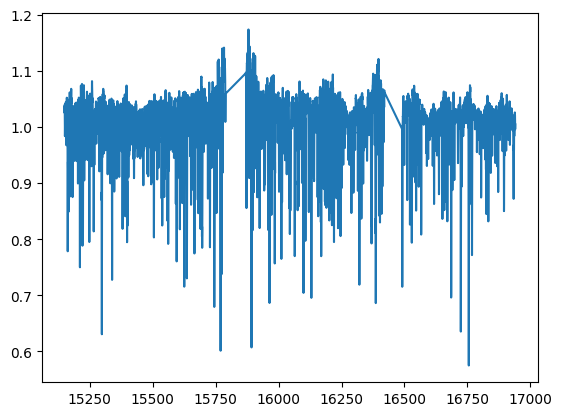

In [ ]:
plt.plot(wl, fluxes[0])
plt.show()

### Leave one out cross validation

In [1]:
apokasc_sdss_bedell_df[["Teff", "logg", "feh", "mg_h", "Age"]]

NameError: name 'apokasc_sdss_bedell_df' is not defined

In [ ]:
import loocv

#print(len(fluxes[0]))
#print(len(fluxes[1:]))
preds = loocv.loocv(apokasc_sdss_bedell_df, wl, fluxes, ivars)

  0%|          | 0/403 [00:00<?, ?it/s]2025-05-07 15:35:22,043 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:35:22,067 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (27s)                                


stty: stdin isn't a terminal
2025-05-07 15:35:49,481 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:35:49,481 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  0%|          | 1/403 [00:27<3:05:02, 27.62s/it]2025-05-07 15:35:49,582 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:35:49,591 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (24s)                                


stty: stdin isn't a terminal
2025-05-07 15:36:13,897 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:36:13,898 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  0%|          | 2/403 [00:52<2:51:52, 25.72s/it]2025-05-07 15:36:14,028 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:36:14,037 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (29s)                                


stty: stdin isn't a terminal
2025-05-07 15:36:43,426 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:36:43,426 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  1%|          | 3/403 [01:21<3:03:20, 27.50s/it]2025-05-07 15:36:43,642 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:36:43,652 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (30s)                                


stty: stdin isn't a terminal
2025-05-07 15:37:13,523 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:37:13,525 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  1%|          | 4/403 [01:51<3:09:41, 28.52s/it]2025-05-07 15:37:13,725 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:37:13,735 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (29s)                                


stty: stdin isn't a terminal
2025-05-07 15:37:42,997 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:37:42,997 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  1%|          | 5/403 [02:21<3:11:24, 28.86s/it]2025-05-07 15:37:43,115 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:37:43,124 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (24s)                                


stty: stdin isn't a terminal
2025-05-07 15:38:07,486 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:38:07,487 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  1%|▏         | 6/403 [02:45<3:01:06, 27.37s/it]2025-05-07 15:38:07,618 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:38:07,629 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (27s)                                


stty: stdin isn't a terminal
2025-05-07 15:38:34,390 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:38:34,391 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  2%|▏         | 7/403 [03:12<2:59:36, 27.21s/it]2025-05-07 15:38:34,579 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:38:34,588 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (25s)                                


stty: stdin isn't a terminal
2025-05-07 15:38:59,590 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:38:59,591 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  2%|▏         | 8/403 [03:37<2:54:50, 26.56s/it]2025-05-07 15:38:59,702 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal2025-05-07 15:38:59,711 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[                                                                                                    ]   0% (33/7409)                          

[====================================================================================================] 100% (27s)                                


stty: stdin isn't a terminal
2025-05-07 15:39:26,535 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:39:26,536 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  2%|▏         | 9/403 [04:04<2:55:18, 26.70s/it]2025-05-07 15:39:26,795 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:39:26,805 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (27s)                                


stty: stdin isn't a terminal
2025-05-07 15:39:53,575 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:39:53,576 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  2%|▏         | 10/403 [04:31<2:55:26, 26.78s/it]2025-05-07 15:39:53,660 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:39:53,670 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (24s)                                


stty: stdin isn't a terminal
2025-05-07 15:40:18,060 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:40:18,061 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  3%|▎         | 11/403 [04:56<2:50:23, 26.08s/it]2025-05-07 15:40:18,186 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:40:18,196 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (27s)                                


stty: stdin isn't a terminal
2025-05-07 15:40:45,167 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:40:45,168 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  3%|▎         | 12/403 [05:23<2:52:01, 26.40s/it]2025-05-07 15:40:45,285 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:40:45,297 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (24s)                                


stty: stdin isn't a terminal
2025-05-07 15:41:09,411 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:41:09,412 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  3%|▎         | 13/403 [05:47<2:47:20, 25.74s/it]2025-05-07 15:41:09,535 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:41:09,544 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (28s)                                


stty: stdin isn't a terminal2025-05-07 15:41:37,133 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2025-05-07 15:41:37,137 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  3%|▎         | 14/403 [06:15<2:50:57, 26.37s/it]2025-05-07 15:41:37,379 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:41:37,392 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (26s)                                


stty: stdin isn't a terminal2025-05-07 15:42:03,136 [DEBUG] Couldn't get screen size. Progressbar may look odd.

2025-05-07 15:42:03,137 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  4%|▎         | 15/403 [06:41<2:49:41, 26.24s/it]2025-05-07 15:42:03,261 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: 2025-05-07 15:42:03,274 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[                                                                                                    ]   0% (18/7409)                          

stdin isn't a terminal


[====================================================================================================] 100% (28s)                                


stty: stdin isn't a terminal
2025-05-07 15:42:31,783 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:42:31,783 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  4%|▍         | 16/403 [07:09<2:53:57, 26.97s/it]2025-05-07 15:42:32,500 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:42:32,510 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (27s)                                


stty: stdin isn't a terminal
2025-05-07 15:42:59,886 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:42:59,888 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  4%|▍         | 17/403 [07:38<2:55:44, 27.32s/it]2025-05-07 15:43:00,064 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:43:00,075 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (26s)                                


stty: stdin isn't a terminal
2025-05-07 15:43:26,138 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:43:26,139 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  4%|▍         | 18/403 [08:04<2:53:04, 26.97s/it]2025-05-07 15:43:26,268 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:43:26,279 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (28s)                                


stty: stdin isn't a terminal
2025-05-07 15:43:54,781 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:43:54,782 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  5%|▍         | 19/403 [08:32<2:55:53, 27.48s/it]2025-05-07 15:43:55,178 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:43:55,226 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (45s)                                


stty: stdin isn't a terminal
2025-05-07 15:44:39,914 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:44:39,916 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  5%|▍         | 20/403 [09:18<3:29:15, 32.78s/it]2025-05-07 15:44:40,278 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:44:40,290 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (28s)                                


stty: stdin isn't a terminal
2025-05-07 15:45:08,079 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:45:08,081 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  5%|▌         | 21/403 [09:46<3:20:01, 31.42s/it]2025-05-07 15:45:10,066 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:45:10,229 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (28s)                                


stty: stdin isn't a terminal
2025-05-07 15:45:38,643 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:45:38,644 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  5%|▌         | 22/403 [10:16<3:17:51, 31.16s/it]2025-05-07 15:45:39,275 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:45:39,287 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[====================================================================================================] 100% (26s)                                


stty: stdin isn't a terminal
2025-05-07 15:46:05,501 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-07 15:46:05,502 [INFO] Running test step on 1 spectra


[=                                                                                                   ] 100% (0s)                         


  6%|▌         | 23/403 [10:43<3:09:02, 29.85s/it]2025-05-07 15:46:05,691 [INFO] Training 5-label CannonModel with 402 stars and 7409 pixels/star
stty: stdin isn't a terminal
2025-05-07 15:46:05,703 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[===================================================================================                 ]  84% (6201/7409)                          

In [ ]:
#preds.to_csv(path+'data/preds.csv', index=False)

In [13]:
preds

sdss_id    Teff_pred  logg_pred  fe_h_pred  mg_h_pred  Teff_test  \
0   66668317  6525.670716   4.006890   0.062911  -0.018737     6433.0   
1   66658357  6240.726646   3.787829  -0.237998  -0.170563     6361.0   
2   66669718  6278.929626   3.900480   0.007284   0.079782     5238.0   
3   66667695  6270.429263   3.900109   0.017366   0.121772     6029.0   
4   67387629  6086.671273   4.000868   0.348585   0.274187     6688.0   
..       ...          ...        ...        ...        ...        ...   
95  67435770  6063.293923   4.000285   0.255990   0.215445     6574.0   
96  67113431  6235.576395   4.074518   0.262848   0.225355     5290.0   
97  67436155  6160.648439   3.724085  -0.186736  -0.110400     6317.0   
98  67436408  6388.078043   3.987621   0.037858  -0.094363     6214.0   
99  67087084  6241.510867   3.870257  -0.040221   0.058144     5220.0   

    logg_test  fe_h_test  mg_h_test  
0       4.109       0.00   0.014126  
1       3.819       0.02  -0.003149  
2       3.736      -0.08   0.009223  
3       3.994      -0.26  -0.184236  
4       4.193      -0.02  -0.059170  
..        ...        ...        ...  
95      4.074      -0.24  -0.361665  
96      3.685      -0.14  -0.054708  
97      4.036       0.16   0.106445  
98      4.003       0.21   0.262831  
99      3.401      -0.14  -0.091989  

[100 rows x 9 columns]

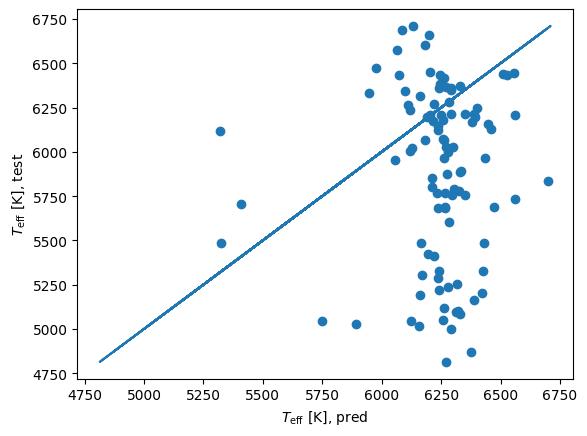

In [14]:
plt.scatter(preds['Teff_pred'], preds['Teff_test'])
plt.plot(preds['Teff_test'], preds['Teff_test'])
plt.xlabel(r"$T_{\rm eff}$ [K], pred")
plt.ylabel(r"$T_{\rm eff}$ [K], test")
#plt.legend()
#plt.savefig(path+'plots/teff_check.png')
plt.show()

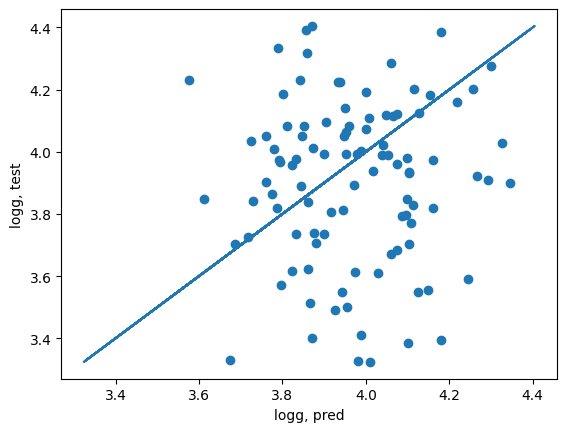

In [15]:
plt.scatter(preds['logg_pred'], preds['logg_test'])
plt.plot(preds['logg_test'], preds['logg_test'])
plt.xlabel(r"logg, pred")
plt.ylabel(r"logg, test")
#plt.savefig(path+'plots/logg_check.png')
plt.show()

In [7]:

# training set
flux_tr = np.array(fluxes[:70])
ivar_tr = np.array(ivars[:70])

Teff_tr = apokasc_sdss_bedell_df_tr['Teff'].values
logg_tr = apokasc_sdss_bedell_df_tr['logg'].values
fe_h_tr = apokasc_sdss_bedell_df_tr['feh'].values
mg_h_tr = apokasc_sdss_bedell_df_tr['mg_h'].values
labels_tr = np.vstack((Teff_tr,logg_tr,fe_h_tr,mg_h_tr)).T
print("label_tr: ", labels_tr.shape)
print("flux_tr: ", flux_tr.shape)
print("ivar_tr: ", ivar_tr.shape)

# test set
flux_test = np.array(fluxes[70:])
ivar_test = np.array(ivars[70:])

Teff_test = apokasc_sdss_bedell_df_test['Teff'].values
logg_test = apokasc_sdss_bedell_df_test['logg'].values
fe_h_test = apokasc_sdss_bedell_df_test['feh'].values
mg_h_test = apokasc_sdss_bedell_df_test['mg_h'].values
labels_test = np.vstack((Teff_test,logg_test,fe_h_test,mg_h_test)).T

spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum normalized!
spectrum norm

[ERROR]: Traceback (most recent call last):
  File "/Users/chrislam/anaconda3/envs/test-cannon/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/tt/rlpbr2fs7lx14h3f5_21mr240000gn/T/ipykernel_52626/4039091536.py", line 13, in <module>
    Teff_tr = apokasc_sdss_bedell_df_tr['Teff'].values
NameError: name 'apokasc_sdss_bedell_df_tr' is not defined



spectrum normalized!


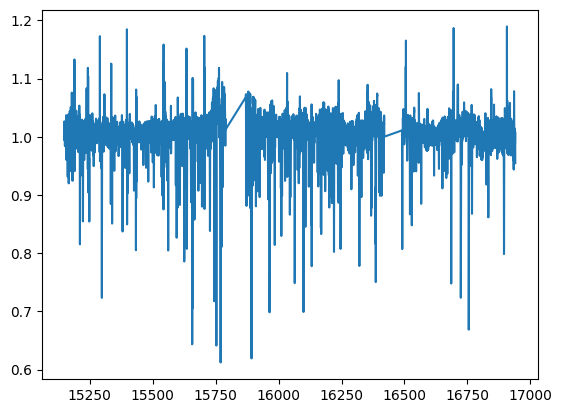

In [277]:
plt.plot(wl, flux_test[0])

2025-05-02 17:30:41,791 [INFO] Training 4-label CannonModel with 70 stars and 7409 pixels/star
stty: stdin isn't a terminal2025-05-02 17:30:41,810 [DEBUG] Couldn't get screen size. Progressbar may look odd.


[                                                                                                    ]   1% (69/7409)                          

[====================================================================================================] 100% (20s)                                
theta:  [[ 9.95835641e-01  1.56464865e-02  1.39452115e-04 ... -6.25196265e-02
   9.67254881e-02  1.27417967e-02]
 [ 9.97290724e-01 -8.03861746e-04 -9.25704736e-03 ...  2.24173869e-02
  -1.90805127e-01  1.76855366e-01]
 [ 1.00352311e+00 -1.64937667e-02 -1.24316373e-02 ...  5.13004721e-02
  -2.75694850e-01  2.12500157e-01]
 ...
 [ 9.94049012e-01  3.36614590e-03 -8.00111604e-03 ... -2.25589836e-01
   3.44524252e-01 -1.29638202e-01]
 [ 9.94098245e-01 -3.36035702e-03 -6.64239021e-03 ... -1.00799730e-01
   8.99603057e-02 -1.71849520e-02]
 [ 9.97061935e-01 -2.00457103e-02  2.64365114e-03 ... -2.61043341e-02
  -2.35410749e-02  3.09442021e-02]]
s2:  [0. 0. 0. ... 0. 0. 0.]
metadata:  [{'grad': array([-1.68182050e-08, -2.10526903e-08, -3.52583898e-09, -7.91467543e-09,
       -2.37290900e-09,  1.28788725e-09,  2.54723582e-09,  6.41717308e-09,
        4.

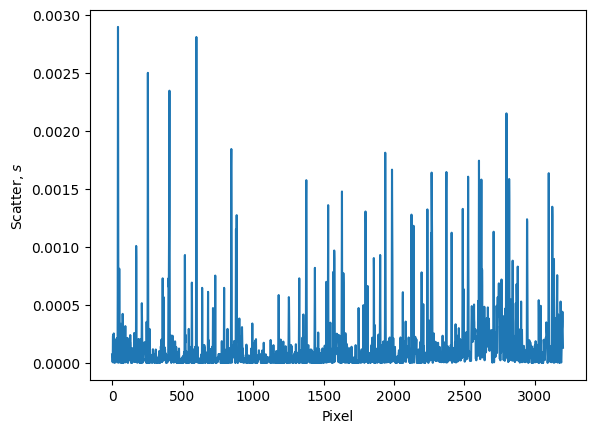

In [38]:
# Specify the labels that we will use to construct this model.
label_names = ["Teff", "logg", "feh", "mg_h"]

#apokasc_sdss_bedell_df_training = apokasc_sdss_bedell_df_sub.iloc[:15]
#apokasc_sdss_bedell_df_test = apokasc_sdss_bedell_df_sub.iloc[15:]

# Organize ingredients 
#Teff_tr = apokasc_sdss_bedell_df_training['Teff'].values
#logg_tr = apokasc_sdss_bedell_df_training['logg'].values
#feh_tr = apokasc_sdss_bedell_df_training['feh'].values
#mg_h_tr = apokasc_sdss_bedell_df_training['mg_h'].values
#training_set_labels = np.vstack((Teff_tr, logg_tr, feh_tr, mg_h_tr)).T
#training_set_labels = apokasc_sdss_bedell_df_training[['Teff', 'logg', 'feh', 'mg_h']]

# per Andy Casey, training_set_labels must be indexed by words, not numbers
training_set_labels = Table(
    data={
        "Teff": Teff_tr,
        "logg": logg_tr,
        "feh": fe_h_tr,
        "mg_h": mg_h_tr
    }
)

test_set_labels = Table(
    data={
        "Teff": Teff_test,
        "logg": logg_test,
        "feh": fe_h_test,
        "mg_h": mg_h_test
    }
)

# Construct a CannonModel object using a quadratic (O=2) polynomial vectorizer.
model = tc.CannonModel(
    training_set_labels, flux_tr, ivar_tr, dispersion=wl, # needed to set dispersion explicitly
    vectorizer=tc.vectorizer.PolynomialVectorizer(label_names, 2))

# training step
theta, s2, metadata = model.train(threads=1)
print("theta: ", theta)
print("s2: ", s2)
print("metadata: ", metadata)

# Show the noise residuals, but skip the first 300 pixels because
# they are at the edge of the chip and contain no information.
# (Note that the last few pixels have s2 = inf because they also
# contain no information)
plt.plot(s2[300:3500])
plt.xlabel('Pixel')
plt.ylabel(r'Scatter, $s$')
plt.show()


In [39]:
# test step
test_labels, cov_val, metadata_val = model.test(flux_test, ivar_test)
print(test_labels, cov_val, metadata_val)

# get Cannon-derived model spectra
#model_spectra = model(test_set_labels) ## this errors out? 
#print(model_spectra)


stty: stdin isn't a terminal
2025-05-02 17:31:04,898 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2025-05-02 17:31:04,899 [INFO] Running test step on 30 spectra


[==============================                                                                      ] 100% (1s)                             
[[ 6.10020367e+03  4.32910742e+00  7.84561050e-02  1.29210497e-01]
 [ 6.20598632e+03  4.28024185e+00 -6.64187584e-02 -2.32013222e-02]
 [ 6.37704875e+03  4.14562787e+00  1.72647620e-04 -4.22036993e-02]
 [ 6.24082136e+03  4.22576386e+00  2.05691009e-03  2.20624097e-02]
 [ 6.24662729e+03  3.75402652e+00 -7.14386826e-02  5.25603984e-02]
 [ 6.32122060e+03  4.23056270e+00 -9.85724444e-02 -1.06292666e-01]
 [ 6.31817184e+03  3.97450340e+00  5.38040408e-04  7.77440479e-03]
 [ 6.23340004e+03  3.85465155e+00 -4.29693674e-02  8.96619516e-03]
 [ 6.33701826e+03  4.19800625e+00 -1.05185844e-01 -1.32555591e-01]
 [ 6.30396659e+03  3.98007280e+00 -2.09284773e-02  1.02366577e-01]
 [ 6.18285569e+03  3.91096930e+00 -6.76771885e-02 -1.58337419e-01]
 [ 6.22483608e+03  3.83994201e+00  1.63887534e-02  5.66286830e-02]
 [ 6.33509996e+03  4.12671326e+00  1.15394670e-01  3.9

In [55]:
#apokasc_sdss_bedell_sub.to_csv(path+'data/small.csv', index=False)

KIC    Teff  e_Teff    M_H  e_M_H    Rad  E_Rad  e_Rad  sysrad  \
0     1435467  6433.0    86.0 -0.028  0.099  1.693  0.015 -0.016   0.010   
1     2010607  6361.0    71.0 -0.070  0.100  2.410  0.100 -0.090   0.035   
2     2309595  5238.0    65.0 -0.095  0.101  2.423  0.076 -0.073   0.022   
3     2450729  6029.0    59.0 -0.212  0.100  1.758  0.059 -0.056   0.023   
4     2837475  6688.0    57.0 -0.015  0.100  1.710  0.022 -0.043   0.039   
..        ...     ...     ...    ...    ...    ...    ...    ...     ...   
401  12069569  6357.0    59.0 -0.109  0.100  2.314  0.086 -0.079   0.040   
402  12117868  6160.0    51.0 -0.108  0.099  1.326  0.045 -0.042   0.015   
403  12265063  6189.0    60.0 -0.268  0.101  1.641  0.052 -0.050   0.024   
404  12317678  6549.0    48.0 -0.300  0.204  1.851  0.019 -0.018   0.029   
405  12366681  6188.0    66.0  0.150  0.100  2.620  0.046 -0.033   0.032   

      Mass  ...  mass_err2  prov_sec  nconfp  nkoi  ntce    jmag    hmag  \
0    1.344  ...     -0.075   b'DSEP'       0     0     0   7.983   7.753   
1    1.402  ...     -0.111   b'DSEP'       0     1     1  10.427  10.204   
2    1.167  ...     -0.140   b'DSEP'       0     0     1  10.040   9.604   
3    1.112  ...     -0.063   b'DSEP'       0     0     0   9.585   9.333   
4    1.665  ...     -0.067   b'DSEP'       0     0     0   7.649   7.481   
..     ...  ...        ...       ...     ...   ...   ...     ...     ...   
401  1.363  ...     -0.098   b'DSEP'       0     0     0  10.286  10.070   
402  1.110  ...     -0.065   b'DSEP'       0     0     0   9.486   9.279   
403  1.120  ...     -0.066   b'DSEP'       0     0     0   9.939   9.682   
404  1.452  ...     -0.116   b'DSEP'       0     0     0   7.883   7.655   
405  1.516  ...     -0.066   b'DSEP'       0     1     0   8.581   8.420   

       kmag  planet?  kepler_gaia_mag_diff  
0     7.718  b'none'             -0.094316  
1    10.155  b'cand'             -0.027483  
2     9.500  b'none'             -0.026662  
3     9.283  b'none'             -0.038274  
4     7.464  b'none'             -0.075163  
..      ...      ...                   ...  
401  10.039  b'none'             -0.045595  
402   9.218  b'none'             -0.040008  
403   9.626  b'none'             -0.032385  
404   7.631  b'none'             -0.078539  
405   8.366  b'cand'             -0.032188  

[406 rows x 113 columns]

In [44]:
Teff_pred = test_labels[:,0]
logg_pred = test_labels[:,1]
fe_h_pred = test_labels[:,2]
mg_h_pred = test_labels[:,3]
pred_labels = Table(
    data={
        "Teff": Teff_pred,
        "logg": logg_pred,
        "feh": fe_h_pred,
        "mg_h": mg_h_pred
    }
)
print(pred_labels)
print(test_set_labels)

       Teff               logg        ...          mg_h        
------------------ ------------------ ... ---------------------
 6100.203668555855 4.3291074180213185 ...    0.1292104973919306
  6205.98631775562  4.280241854716862 ... -0.023201322234874464
 6377.048745362427  4.145627867020514 ...  -0.04220369932194438
 6240.821364722147  4.225763856613506 ...  0.022062409738725277
 6246.627294942399 3.7540265186395447 ...   0.05256039837367349
 6321.220601123306  4.230562698300393 ...  -0.10629266576218331
  6318.17184062152   3.97450339594402 ...  0.007774404790863386
 6233.400035733776 3.8546515510407864 ...  0.008966195164405208
 6337.018256184382  4.198006250641552 ...  -0.13255559138307685
 6303.966592021939 3.9800727990715066 ...    0.1023665770301537
               ...                ... ...                   ...
6206.5953224037485 3.8733802243379536 ...   0.07929121279179321
 5515.550734425005  3.785817150548658 ...   -0.2175380107580814
 6412.989537175355  4.068033791657027 ..

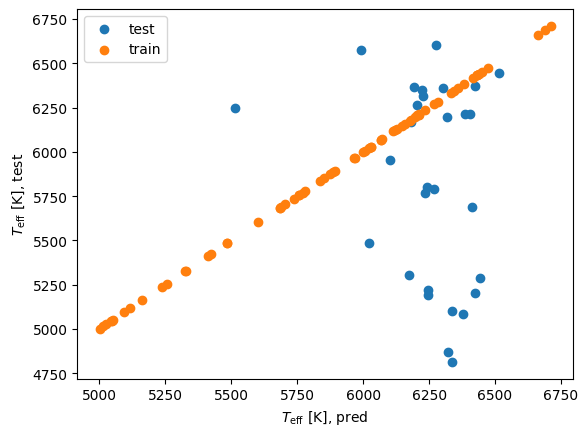

In [45]:
plt.scatter(pred_labels['Teff'], test_set_labels['Teff'], label='test')
plt.scatter(training_set_labels['Teff'], training_set_labels['Teff'], label='train')
plt.xlabel(r"$T_{\rm eff}$ [K], pred")
plt.ylabel(r"$T_{\rm eff}$ [K], test")
plt.legend()
plt.savefig(path+'plots/teff_check.png')
plt.show()
# lmao

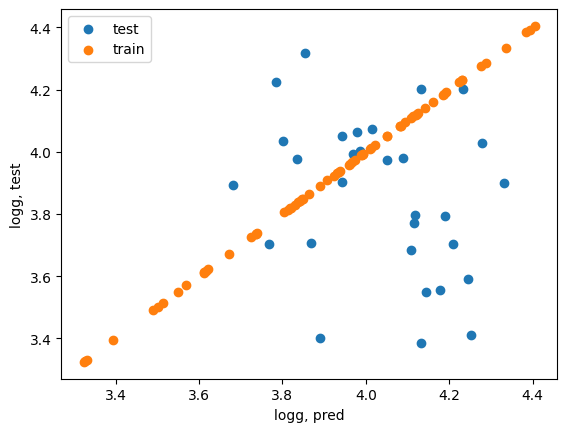

In [252]:
plt.scatter(pred_labels['logg'], test_set_labels['logg'], label='test')
plt.scatter(training_set_labels['logg'], training_set_labels['logg'], label='train')
plt.xlabel(r"logg, pred")
plt.ylabel(r"logg, test")
plt.legend()
plt.savefig(path+'plots/logg_check.png')
plt.show()

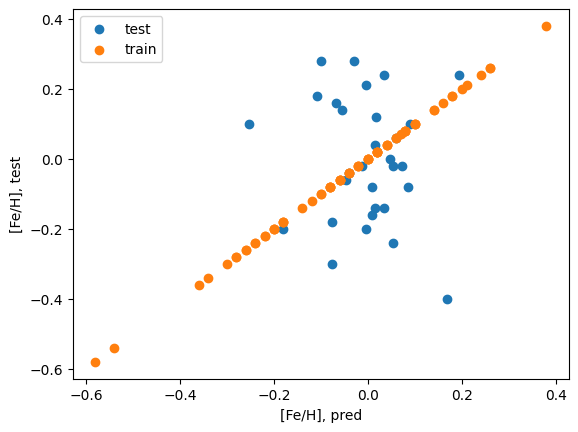

In [253]:
plt.scatter(pred_labels['feh'], test_set_labels['feh'], label='test')
plt.scatter(training_set_labels['feh'], training_set_labels['feh'], label='train')
plt.xlabel(r"[Fe/H], pred")
plt.ylabel(r"[Fe/H], test")
plt.legend()
plt.savefig(path+'plots/feh_check.png')
plt.show()


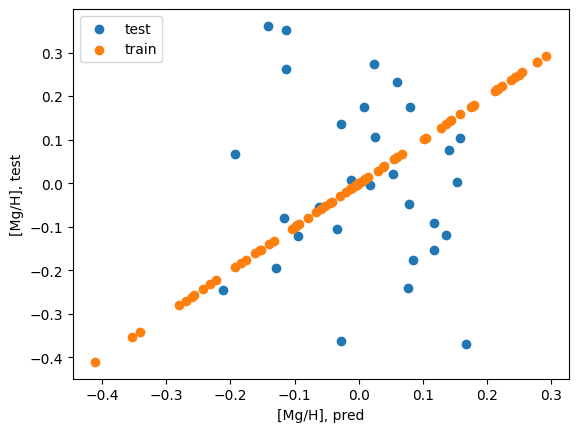

In [254]:
plt.scatter(pred_labels['mg_h'], test_set_labels['mg_h'], label='test')
plt.scatter(training_set_labels['mg_h'], training_set_labels['mg_h'], label='train')
plt.xlabel(r"[Mg/H], pred")
plt.ylabel(r"[Mg/H], test")
plt.legend()
plt.savefig(path+'plots/mgh_check.png')
plt.show()

### Leave one out cross validation

In [256]:
# loocv to manually evaluate the performance of a random forest classifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
X, y = make_blobs(n_samples=100, random_state=1, n_features=4)
print(X, y)
print(X.shape, len(y))

# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# fit model
	model = RandomForestClassifier(random_state=1)
	model.fit(X_train, y_train)
	# evaluate model
	yhat = model.predict(X_test)
	# store
	y_true.append(y_test[0])
	y_pred.append(yhat[0])
# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

[[-1.53940095e+00  5.02369298e+00 -9.69754218e+00 -4.30559839e+00]
 [-5.95049921e+00 -8.73975204e+00 -7.51164915e+00 -2.21294653e+00]
 [-2.88961804e+00  4.95702736e+00 -9.20490564e+00 -4.57687928e+00]
 [-1.85139546e+00  3.51886090e+00 -1.07448708e+01 -2.26089395e+00]
 [-2.34673261e+00  3.56128423e+00 -1.06689586e+01 -3.96601315e+00]
 [-2.30259245e+00  1.93162257e+00 -1.17794336e+00  4.82671833e+00]
 [-2.00341358e+00  4.45008673e+00 -1.06177133e+01 -3.25531651e+00]
 [-1.83198811e+00  3.52863145e+00 -9.95549876e+00 -3.37053333e+00]
 [-1.69825542e+00  2.79071751e+00 -8.87629480e+00 -3.54444801e+00]
 [-7.56309575e+00 -8.46421308e+00 -6.27668726e+00 -4.48540588e+00]
 [-2.76017908e+00  5.55121358e+00 -9.09612178e+00 -3.45085421e+00]
 [-2.00390032e+00  9.87459435e-01 -1.59958214e+00  3.88157773e+00]
 [-7.58703957e-01  3.72276201e+00 -1.01206027e+01 -4.88911798e+00]
 [-8.28462658e+00 -5.70385946e+00 -6.82056994e+00 -3.28762332e+00]
 [-1.68417686e+00  3.63132825e+00 -8.72395657e+00 -1.98624680e

In [ ]:
# create loocv procedure
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split():
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# fit model
	model = RandomForestClassifier(random_state=1)
	model.fit(X_train, y_train)
	# evaluate model
	yhat = model.predict(X_test)
	# store
	y_true.append(y_test[0])
	y_pred.append(yhat[0])
# calculate accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

In [ ]:
#apokasc_sdss_bedell_df_sub.to_csv(path+'data/products/small.csv', index=False)

### Read in enriched data (ie. skip sections above)

In [135]:
import re 

def replace_space_with_comma(text):
  if isinstance(text, str):
    return text.replace('\s+', ',')
  else:
    return text
  
def replace_double_comma_with_nan(text):
  if isinstance(text, str):
    return text.replace(',,', ',NaN,')
  else:
    return text
  
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        print(e)
        return np.nan

def parse_float_list(s):
    try:
        # Strip brackets and split on whitespace
        return [float(x) for x in s.strip()[1:-1].split()]
    except Exception as e:
        print(f"Error parsing: {s} — {e}")
        return []
    
apokasc_sdss_bedell_df_sub = pd.read_csv(path+'data/products/small.csv') # or whatever path you put this in
print(apokasc_sdss_bedell_df_sub['wavelength'])
apokasc_sdss_bedell_df_sub['wavelength'] = apokasc_sdss_bedell_df_sub['wavelength'].apply(parse_float_list)#.apply(replace_space_with_comma).apply(literal_eval_w_exceptions)
print(apokasc_sdss_bedell_df_sub['wavelength'])
fadsfafd

# Sample DataFrame with a string representation of a list
df = pd.DataFrame({'list_column': ["['a', 'b', 'c']", "['1', '2', '3']"]})
print(df['list_column'].iloc[0])
print(apokasc_sdss_bedell_df_sub['wavelength'])

# Function to apply ast.literal_eval
def string_to_list(list_string):
    return ast.literal_eval(list_string)

# Apply the function to the column
df['list_column'] = df['list_column'].apply(string_to_list)


[ERROR]: Traceback (most recent call last):
  File "/Users/chrislam/anaconda3/envs/test-cannon/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/tt/rlpbr2fs7lx14h3f5_21mr240000gn/T/ipykernel_1127/812075897.py", line 34, in <module>
    fadsfafd
NameError: name 'fadsfafd' is not defined



0     [15150.117 15150.327 15150.536 ... 16939.32  1...
1     [15150.117 15150.327 15150.536 ... 16939.32  1...
2     [15150.117 15150.327 15150.536 ... 16939.32  1...
3     [15150.117 15150.327 15150.536 ... 16939.32  1...
4     [15150.117 15150.327 15150.536 ... 16939.32  1...
5     [15150.117 15150.327 15150.536 ... 16939.32  1...
6     [15150.117 15150.327 15150.536 ... 16939.32  1...
7     [15150.117 15150.327 15150.536 ... 16939.32  1...
8     [15150.117 15150.327 15150.536 ... 16939.32  1...
9     [15150.117 15150.327 15150.536 ... 16939.32  1...
10    [15150.117 15150.327 15150.536 ... 16939.32  1...
11    [15150.117 15150.327 15150.536 ... 16939.32  1...
12    [15150.117 15150.327 15150.536 ... 16939.32  1...
13    [15150.117 15150.327 15150.536 ... 16939.32  1...
14    [15150.117 15150.327 15150.536 ... 16939.32  1...
15    [15150.117 15150.327 15150.536 ... 16939.32  1...
16    [15150.117 15150.327 15150.536 ... 16939.32  1...
17    [15150.117 15150.327 15150.536 ... 16939.3

In [87]:
small_table = Table.read(path+'data/products/small.csv').to_pandas()
small_table['wavelength'].iloc[0]


'[15150.117 15150.327 15150.536 ... 16939.32  16939.555 16939.79 ]'

In [122]:
#converters={'wavelength': float, 'norm_flux': float, 'ivar': float}
def replace_space_with_comma(text):
  if isinstance(text, str):
    return text.replace('\s+', ',')
  else:
    return text
  
def lambda_split(text):
   return [float(x.strip(' []')) for x in text.split('\s+')]
  
apokasc_sdss_bedell_df_sub = pd.read_csv(path+'data/products/small.csv') # or whatever path you put this in
apokasc_sdss_bedell_df_sub['wavelength'].apply(lambda_split)
print("split: ", apokasc_sdss_bedell_df_sub['wavelength'].iloc[0])

apokasc_sdss_bedell_df_sub['wavelength'] = apokasc_sdss_bedell_df_sub['wavelength'].apply(replace_space_with_comma)
print("replace: ", apokasc_sdss_bedell_df_sub['wavelength'].iloc[0])
apokasc_sdss_bedell_df_sub['wavelength'] = apokasc_sdss_bedell_df_sub['wavelength'].apply(replace_space_with_comma).apply(literal_eval_w_exceptions)
print("literal eval: ", apokasc_sdss_bedell_df_sub['wavelength'].iloc[0])

small = convert_string_list_to_float(apokasc_sdss_bedell_df_sub.copy(), 'wavelength')

fadsfadf

from ast import literal_eval
import ast

# correct for the sins of my past (somehow reading out as all strings for some reason)
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        pass

def convert_string_list_to_float(df, column_name):
    """
    Converts a column of lists represented as strings to lists of floats.

    Args:
        df (pd.DataFrame): The DataFrame containing the column.
        column_name (str): The name of the column to convert.

    Returns:
        pd.DataFrame: The modified DataFrame with the converted column.
    """
    df[column_name] = df[column_name].apply(str)
    df[column_name] = df[column_name].apply(ast.literal_eval)
    df[column_name] = df[column_name].apply(lambda lst: [float(x) for x in lst])
    return df

small = convert_string_list_to_float(apokasc_sdss_bedell_df_sub.copy(), 'wavelength')
small = convert_string_list_to_float(apokasc_sdss_bedell_df_sub.copy(), 'norm_flux')
small = convert_string_list_to_float(apokasc_sdss_bedell_df_sub.copy(), 'ivar')
print(small)
#apokasc_sdss_bedell_df_sub['wavelength'] = apokasc_sdss_bedell_df_sub['wavelength'].apply(literal_eval_w_exceptions)
#apokasc_sdss_bedell_df_sub['norm_flux'] = apokasc_sdss_bedell_df_sub['norm_flux'].apply(literal_eval_w_exceptions)
#apokasc_sdss_bedell_df_sub['ivar'] = apokasc_sdss_bedell_df_sub['ivar'].apply(literal_eval_w_exceptions)

norm_fluxes = small['norm_flux']
ivars = small['ivar']
print(norm_fluxes)


[ERROR]: Traceback (most recent call last):
  File "/Users/chrislam/anaconda3/envs/test-cannon/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/tt/rlpbr2fs7lx14h3f5_21mr240000gn/T/ipykernel_1127/4050996406.py", line 12, in <module>
    apokasc_sdss_bedell_df_sub['wavelength'].apply(lambda_split)
  File "/Users/chrislam/anaconda3/envs/test-cannon/lib/python3.9/site-packages/pandas/core/series.py", line 4917, in apply
    return SeriesApply(
  File "/Users/chrislam/anaconda3/envs/test-cannon/lib/python3.9/site-packages/pandas/core/apply.py", line 1427, in apply
    return self.apply_standard()
  File "/Users/chrislam/anaconda3/envs/test-cannon/lib/python3.9/site-packages/pandas/core/apply.py", line 1507, in apply_standard
    mapped = obj._map_values(
  File "/Users/chrislam/anaconda3/envs/test-cannon/lib/python3.9/site-packages/pandas/core/base.py", line 921, in _map_values
  

In [ ]:
# Train the model
theta, s2, metadata = model.train(threads=1)